In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [47]:
df = pd.read_csv('clean_data.csv')
df.head(3)

,Employee Name,ID,Gender,Age,Married,Role,Salary,Position,Absences,Projects_Completed,...,Moral,Stress & Burnout Score,Ongoing_Project_Count,Projects_Within_Deadline,Project_Start_Date,Project_Description,Project_Difficulty,Project_Deadline,Manager_ID,Completion_Time
0,Ram Prasad,1,Male,34,Married,Backend Developer,"2,60,000",Senior,2,42,...,Very High,3,3,22,5/2/2024,Design an efficient algorithm for data process...,High,15/3/2024,4,37
1,Neeraj Joshi,2,Male,58,Married,Backend Developer,"3,00,000",Senior,8,59,...,High,1,4,50,19/06/2022,Develop a secure user registration and login s...,High,10/07/2022,4,16
2,Shilpa Pathak,3,Female,41,Married,Backend Developer,"3,00,000",Senior,10,68,...,Very High,2,5,24,5/6/2023,Design and implement database structure for ma...,High,15/7/2023,4,38


In [48]:
print(df['Moral'].unique())

['Very High' 'High' 'Moderate' 'Low' 'Very Low']


(537, 24)
0


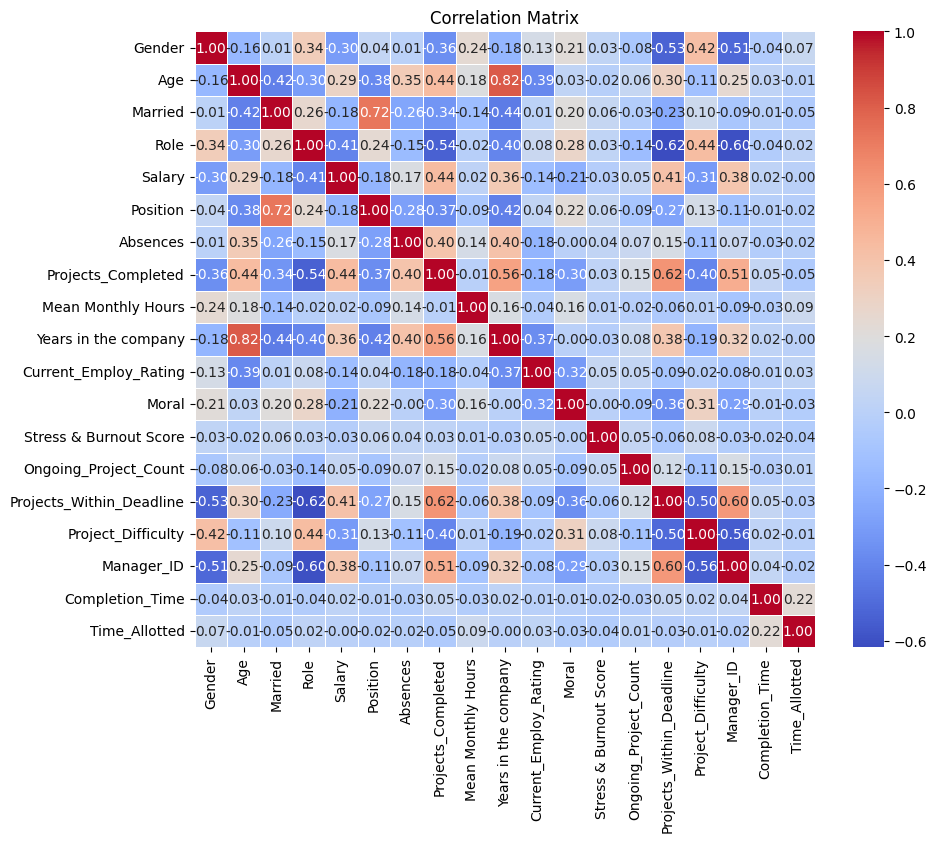

DataFrame after removing correlated features:
Index(['Gender', 'Age', 'Married', 'Role', 'Salary', 'Position', 'Absences',
       'Projects_Completed', 'Mean Monthly Hours', 'Current_Employ_Rating',
       'Moral', 'Stress & Burnout Score', 'Ongoing_Project_Count',
       'Projects_Within_Deadline', 'Project_Difficulty', 'Manager_ID',
       'Completion_Time', 'Time_Allotted'],
      dtype='object')


In [49]:
%run '/content/data_preprocessing.ipynb'

In [53]:
target_variable = ['Moral']

In [54]:
## Train Test Split

# features = ['Married', 'Role', 'Salary', 'Position','Current_Employ_Rating', 'Stress & Burnout Score']
# X = df[features]
X = df.drop(columns=['Moral'])
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (402, 17)
X_test shape: (135, 17)
y_train shape: (402, 1)
y_test shape: (135, 1)


In [55]:
## XGBoost Classifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [56]:
## predictions
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.59
